In [1]:
import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
random.seed(0)

In [2]:
# loading dataset
df = pd.read_csv('/Users/zuelz/DMT Project/McDonald_s_Reviews.csv', encoding='latin-1')
df.head(20)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
5,6,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 weeks ago,I work for door dash and they locked us all ou...,1 star
6,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,If I could give this location a zero on custo...,1 star
7,8,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,Came in and ordered a Large coffee w/no ice. T...,1 star
8,9,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Went thru drive thru. Ordered. Getting home no...,1 star
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4 stars


In [3]:
# data cleaning
import re
import string

def clean(review):
    review = review.lower()
    review = review.replace('ï', '')
    review = review.replace('¿', '')
    review = review.replace('½', '')
    review = review.replace('ý', '')
    review = " ".join(review.split())
    review = review.rstrip()
    return review

df['clean_review'] = [clean(review) for review in df['review']]
df['clean_review'].head(20)

0     why does it look like someone spit on my food?...
1     it'd mcdonalds. it is what it is as far as the...
2     made a mobile order got to the speaker and che...
3     my mc. crispy chicken sandwich was customer se...
4     i repeat my order 3 times in the drive thru, a...
5     i work for door dash and they locked us all ou...
6     if i could give this location a zero on custom...
7     came in and ordered a large coffee w/no ice. t...
8     went thru drive thru. ordered. getting home no...
9     i'm not really a huge fan of fast food, but i ...
10                                       worst mcdonald
11    we stopped by for a quick breakfast. it was no...
12    the morning crew seems fast and efficient. nig...
13    today, i was disappointed in that restaurant #...
14    ordered food burger wrong and left out part of...
15    this was a dine in experience. the tables were...
16    the line ws extremely big and was moving very ...
17    the boy who attended me made me wait and w

In [4]:
# create tf-idf and vocab list for each rating 
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_list = []
tfidf_vocab = {}


for rating in sorted(df.rating.unique()):
    tfidf_list.append(tfidf_vectorizer.fit_transform(df[df.rating == rating].clean_review))
    tfidf_vocab[rating] = tfidf_vectorizer.get_feature_names_out()

[print(f'\nRating: {rating} stars', '\nTFIDF array: ', tfidf.toarray(), '\nVocab list: ', tfidf_vocab[rating]) for rating, tfidf in zip(sorted(df.rating.unique()), tfidf_list)]


Rating: 1 star stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '000' '0000000' ... 'zombies' 'zone' 'zoo']

Rating: 2 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '00am' '01' ... 'yummy' 'zero' 'zoo']

Rating: 3 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '01' '02' ... 'zero' 'zone' 'zoo']

Rating: 4 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '00pm' '10' ... 'yummy' 'yup

[None, None, None, None, None]

In [5]:
# dimensionality reduction to perform all-by-all cosine similarities 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize


shrunk_norm_matrix_list = []

for tfidf in tfidf_list:
    shrunk_norm_matrix_list.append(normalize(TruncatedSVD(n_components=100, random_state=42).fit_transform(tfidf)))
    
cosine_similarity_matrix = [shrunk_norm_matrix @ shrunk_norm_matrix.T for shrunk_norm_matrix in shrunk_norm_matrix_list]
cosine_similarity_matrix

[array([[ 1.        ,  0.12088323, -0.0078843 , ..., -0.00762407,
         -0.0052868 ,  0.10019433],
        [ 0.12088323,  1.        ,  0.06783246, ..., -0.02090068,
         -0.0258837 ,  0.02193616],
        [-0.0078843 ,  0.06783246,  1.        , ...,  0.02252939,
          0.14367982,  0.10065092],
        ...,
        [-0.00762407, -0.02090068,  0.02252939, ...,  1.        ,
          0.5952827 ,  0.07540192],
        [-0.0052868 , -0.0258837 ,  0.14367982, ...,  0.5952827 ,
          1.        ,  0.10612319],
        [ 0.10019433,  0.02193616,  0.10065092, ...,  0.07540192,
          0.10612319,  1.        ]]),
 array([[ 1.        ,  0.11738598,  0.05866192, ...,  0.19254422,
          0.059129  ,  0.01689466],
        [ 0.11738598,  1.        , -0.01017104, ...,  0.00998012,
          0.03093797,  0.01527998],
        [ 0.05866192, -0.01017104,  1.        , ..., -0.01349031,
          0.02476878, -0.02894549],
        ...,
        [ 0.19254422,  0.00998012, -0.01349031, ...,  

In [6]:
# elbow curve function
from sklearn.cluster import MiniBatchKMeans
import time

np.random.seed(0)
def generate_elbow_plot(matrix_list):
    start_time = time.time()
    for index, matrix in enumerate(matrix_list):
        k_values = range(1, 61)
        inertia_values = [MiniBatchKMeans(k, random_state=42).fit(matrix).inertia_ for k in k_values]
        plt.plot(k_values, inertia_values, label=[f'{index+1} star'])
        plt.xlabel('K')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.legend()
    plt.show()
    return print(f'{round(time.time() - start_time)} seconds')

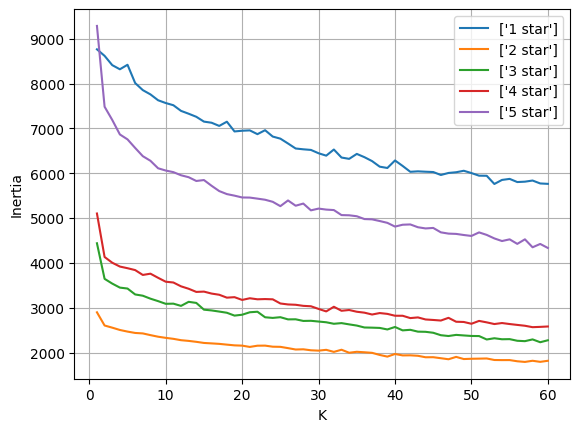

143 seconds


In [7]:
import warnings
warnings.filterwarnings("ignore")

# elbow curve of all ratings 
generate_elbow_plot(shrunk_norm_matrix_list)

In [8]:
# function that creates KMeans for reviews
from sklearn.cluster import KMeans

def compute_cluster_groups(shrunk_norm_matrix, k=10, review=df['clean_review']):
    cluster_model = KMeans(n_clusters=k, random_state=42)
    clusters = cluster_model.fit_predict(shrunk_norm_matrix)
    df = pd.DataFrame({'Index' : range(clusters.size), 'Cluster' : clusters, 'Review' : review})
    return [df_cluster for _, df_cluster in df.groupby('Cluster')]

In [9]:
# clusters for each rating 
cluster_groups = []

for index, rating in enumerate(sorted(df.rating.unique())):
    cluster_groups.append(compute_cluster_groups(shrunk_norm_matrix_list[index], review=df[df.rating == rating].clean_review))
    
print([("For: ", rating, "\n", cluster_groups[index]) for index, rating in enumerate(sorted(df.rating.unique()))][:10])

[('For: ', '1 star', '\n', [       Index  Cluster                                             Review
10         7        0                                     worst mcdonald
33        21        0  just spent 10 minutes waiting at this mcdonald...
233      119        0  worst mcdonald's. ever when to pick up an orde...
271      135        0  it has been many years since i have gone into ...
551      180        0                                  it was mcdonald's
...      ...      ...                                                ...
33274   9397        0  the slowest mcdonald's i've ever met, i've nev...
33298   9405        0  the worst mcdonald's in miami, horrible waitin...
33306   9408        0  the worst service. the staff is rude, the food...
33308   9409        0  it's like any mcdonald's except that the servi...
33314   9412        0  the worst mcdonald's! the attention is terribl...

[594 rows x 3 columns],        Index  Cluster                                             Revie

In [10]:
!pip install wordcloud
from wordcloud import WordCloud

def cluster_to_wordcloud(cluster_group, max_words=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cluster_group)
    vocab_list = vectorizer.get_feature_names_out()
    
    # create a rank list of words
    df_ranked = pd.DataFrame({'Word' : vocab_list, 'Sum TFIDF': tfidf_matrix.toarray().sum(axis=0)}).sort_values('Sum TFIDF', ascending=False)
    
    # create word score
    word_to_score = {word: score for word, score in df_ranked[:max_words].values}
    
    # initialize wordcloud object
    wordcloud_generator = WordCloud(background_color='white')

    # fit wordcloud_generator to word_to_score
    wordcloud_image = wordcloud_generator.fit_words(word_to_score)
    
    return wordcloud_image

In [11]:
def grid_wordcloud(cluster_groups, rating_num, max_words=10, rows=5, columns=2, figsize=(10,10)):
    rating_list = []
    fig, ax = plt.subplots(rows, columns, figsize=figsize)
    for index, cluster in enumerate(cluster_groups):
        row = index // columns
        column = index % columns
        wordcloud_image = cluster_to_wordcloud(cluster_groups[index].Review, max_words)
        ax[row][column].imshow(wordcloud_image, interpolation='bilinear')
        ax[row][column].set_title(f'Cluster: {index}')
        ax[row][column].set_xticks([])
        ax[row][column].set_yticks([])
    fig.suptitle(f"{rating_num}:", fontsize=20)

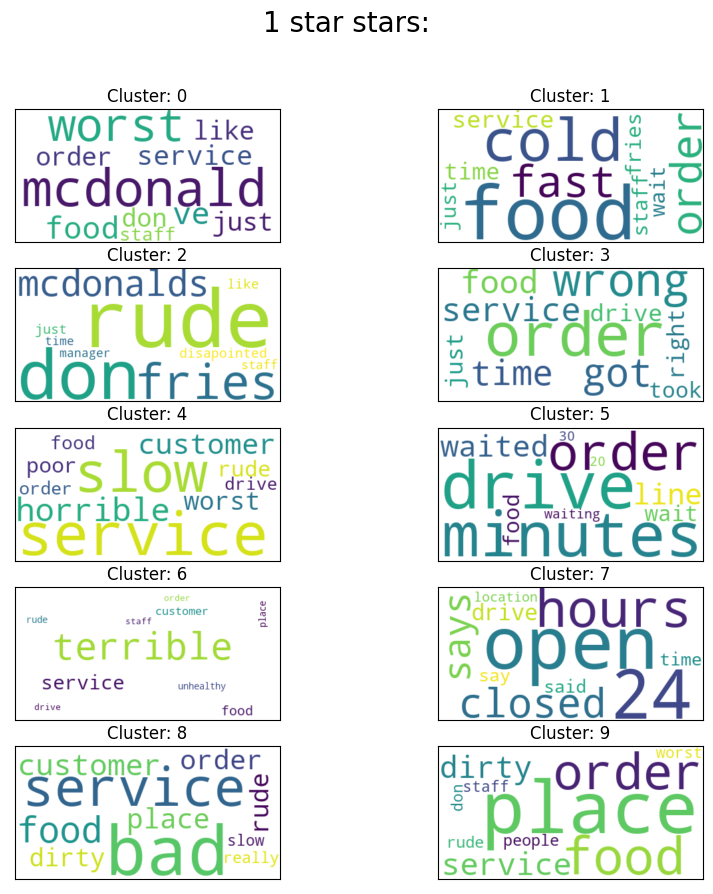

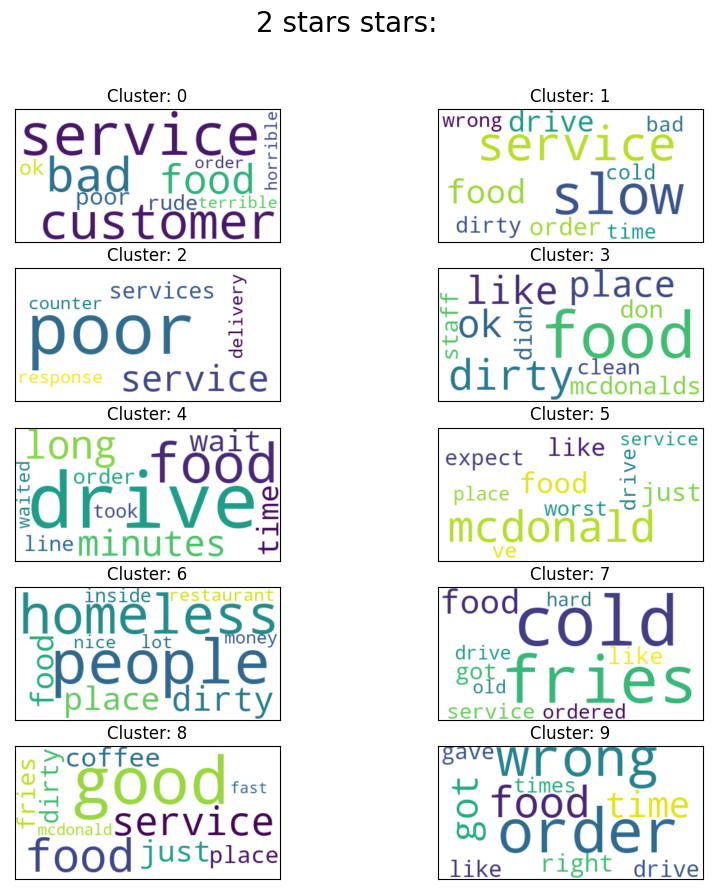

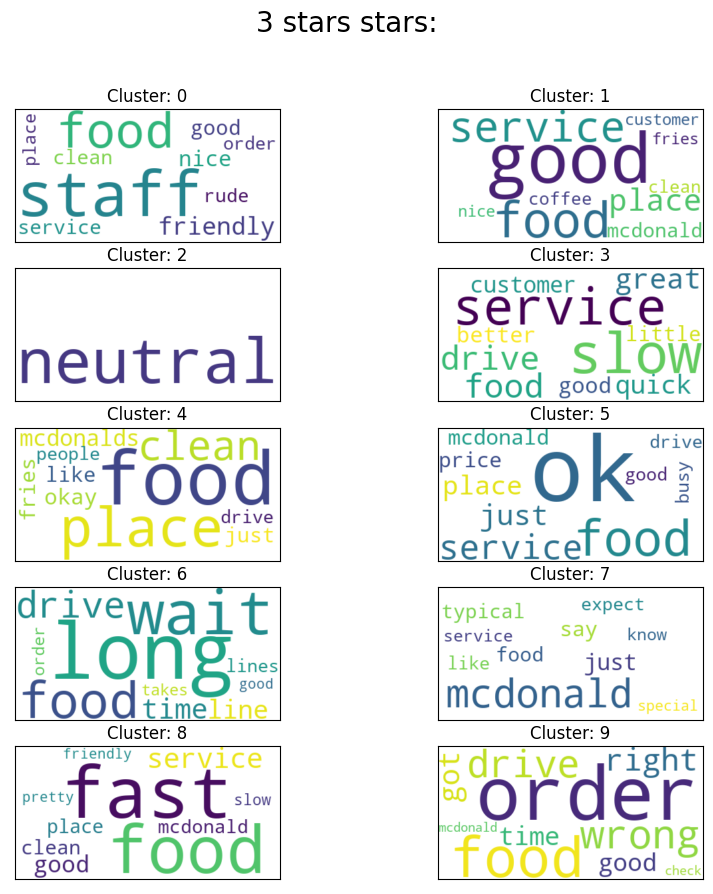

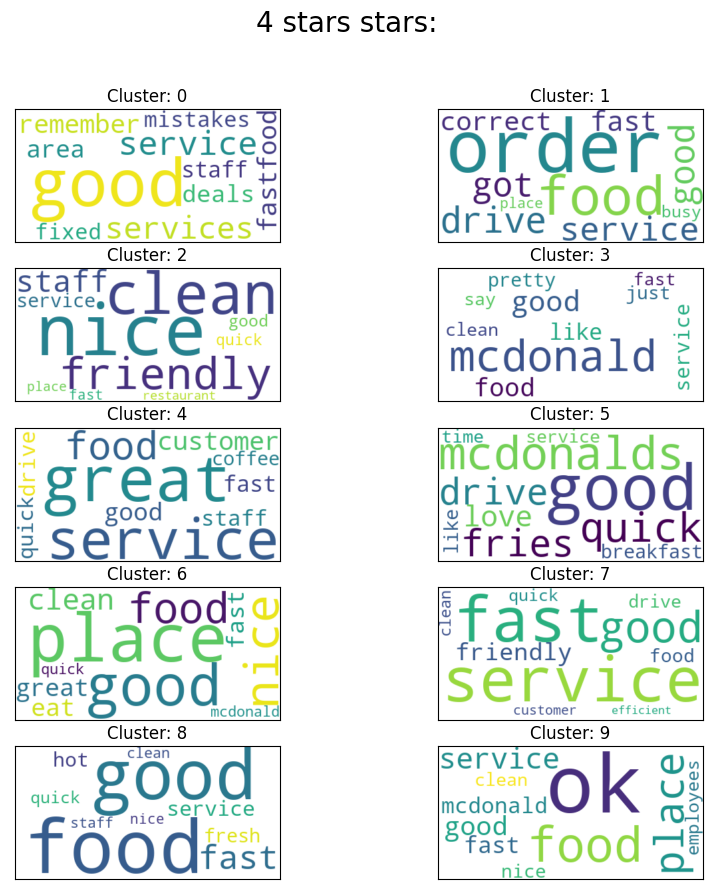

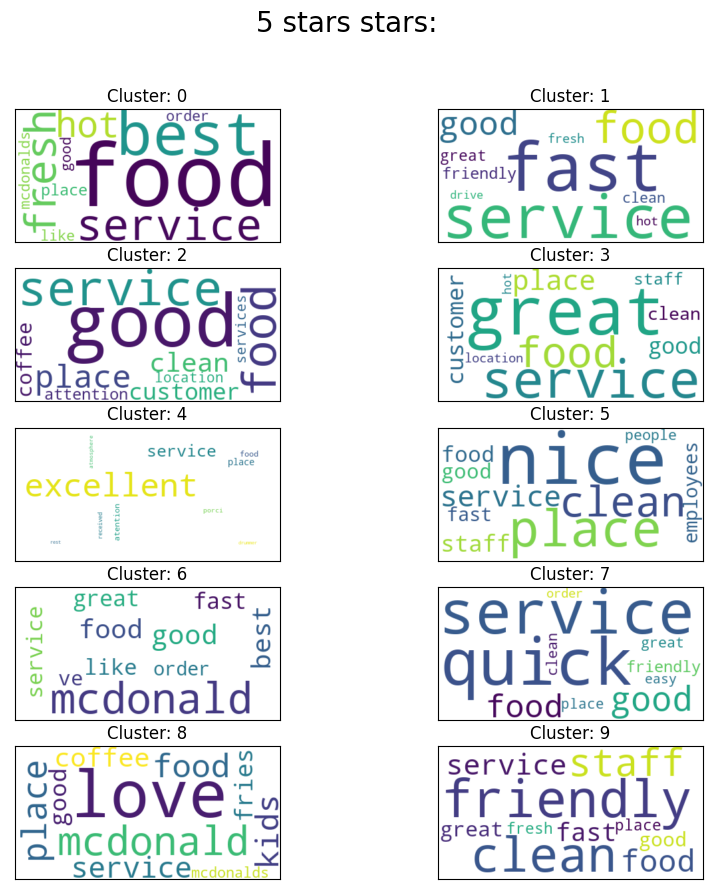

In [12]:
# all clusters wordclouds for each rating
for index, rating in enumerate(sorted(df.rating.unique())):
    grid_wordcloud(cluster_groups[index], rating_num=f'{rating} stars')